In [1]:
import numpy as np
import pandas as pd

# for Scaling , Encoding and Polinomial features for Hidden paterns:
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder , PolynomialFeatures 
from sklearn.feature_selection import SelectKBest , f_classif # for classification

# for Imputing na :
from sklearn.impute import SimpleImputer

# Under sampleling for imbalanced data set:
from imblearn.over_sampling import RandomOverSampler

#For Dimentionality Reduction and as model:
from sklearn.decomposition import PCA

# test case split and Cross validation for right hyper parmeter
from sklearn.model_selection import train_test_split , GridSearchCV

#----------------------------------------------------------------------------------

#MODELS:

# 1) For classificstion type and out target is Binary , Hence we Try with Logistic Regression First:
from sklearn.linear_model import LogisticRegression

# 2) Random Forest for Classification Tasks , Bagging methord may perform well:
from sklearn.ensemble import RandomForestClassifier

# 3) by using simple KNN approch:
from sklearn.neighbors import KNeighborsClassifier

# 4) probability based approch:
from sklearn.naive_bayes import GaussianNB

# 5) Boosing for bagging with continous improvement:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# 6) at last we also trying Voting and Stacking for improvement in Model:
from sklearn.ensemble import VotingClassifier , StackingClassifier

#----------------------------------------------------------------------------------

# Metrics to calculate Classification type traget:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , f1_score

#----------------------------------------------------------------------------------

# for Pipeline Creationa and transformimg.
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#----------------------------------------------------------------------------------

# For chart and visuals.
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
sample_sub = pd.read_csv("sample_submission_iA3afxn.csv")

In [3]:
train_data.shape

(381109, 12)

In [5]:
train_data.shape

(380918, 12)

In [6]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [91]:
sample_sub.head()

,id,Response
0,381110,0
1,381111,1
2,381112,1
3,381113,0
4,381114,0


#### EDA :

In [92]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380918 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    380918 non-null  int64  
 1   Gender                380918 non-null  object 
 2   Age                   380918 non-null  int64  
 3   Driving_License       380918 non-null  int64  
 4   Region_Code           380918 non-null  float64
 5   Previously_Insured    380918 non-null  int64  
 6   Vehicle_Age           380918 non-null  object 
 7   Vehicle_Damage        380918 non-null  object 
 8   Annual_Premium        380918 non-null  float64
 9   Policy_Sales_Channel  380918 non-null  float64
 10  Vintage               380918 non-null  int64  
 11  Response              380918 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 37.8+ MB


In [93]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


###### ------->  no null values in both Train and Test data

In [94]:
train_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,380918.000000,380918.000000,380918.000000,380918.000000,380918.000000,380918.000000,380918.000000,380918.000000,380918.000000
mean,190555.458550,38.820565,0.997868,26.388362,0.458253,30454.411199,112.040967,154.346728,0.122538
std,110016.428314,15.510749,0.046121,13.231873,0.498255,16373.166153,54.202173,83.669418,0.327907
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95281.250000,25.000000,1.000000,15.000000,0.000000,24400.000000,29.000000,82.000000,0.000000
50%,190559.500000,36.000000,1.000000,28.000000,0.000000,31661.000000,133.000000,154.000000,0.000000
75%,285829.750000,49.000000,1.000000,35.000000,1.000000,39384.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,147075.000000,163.000000,299.000000,1.000000


In [98]:
train_data.shape

(380918, 12)

In [99]:
test_data.shape

(127037, 11)

In [96]:
train_data.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [97]:
train_data.duplicated().sum()  # No Dupicates

0

In [100]:
train_data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [101]:
train_data['Response'].value_counts(normalize=True)

Response
0    0.877462
1    0.122538
Name: proportion, dtype: float64

In [102]:
train_data['Response'].value_counts()

Response
0    334241
1     46677
Name: count, dtype: int64

###### ----> we have data imbalance issue

In [103]:
train_data['Region_Code'].value_counts()

Region_Code
28.0    106278
8.0      33866
46.0     19746
41.0     18256
15.0     13308
30.0     12191
29.0     11061
50.0     10242
3.0       9247
11.0      9232
36.0      8795
33.0      7654
47.0      7435
35.0      6939
6.0       6280
45.0      5605
37.0      5493
18.0      5152
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3276
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2638
17.0      2614
26.0      2587
25.0      2502
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1278
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: count, dtype: int64

In [104]:
num_col = train_data.select_dtypes(include= 'number').columns
num_col

Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [105]:
cate_col = train_data.select_dtypes(exclude= 'number').columns
cate_col

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

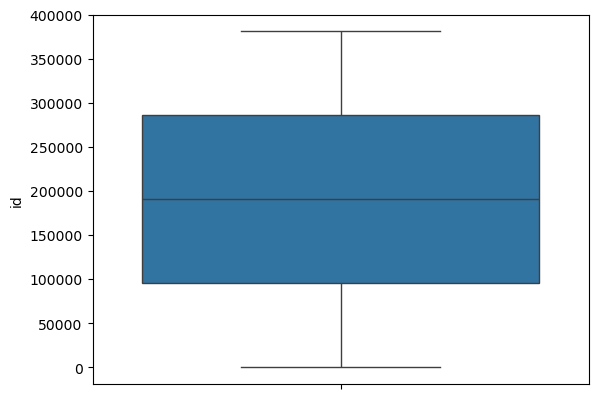

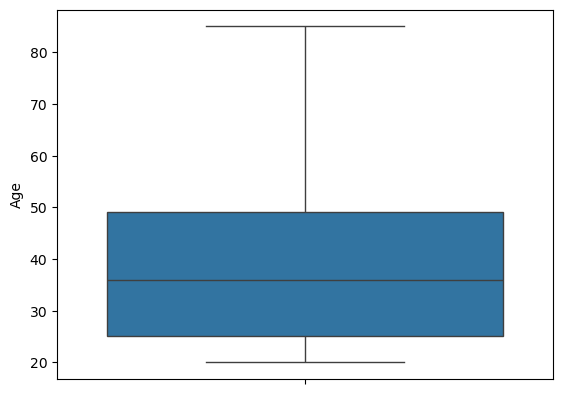

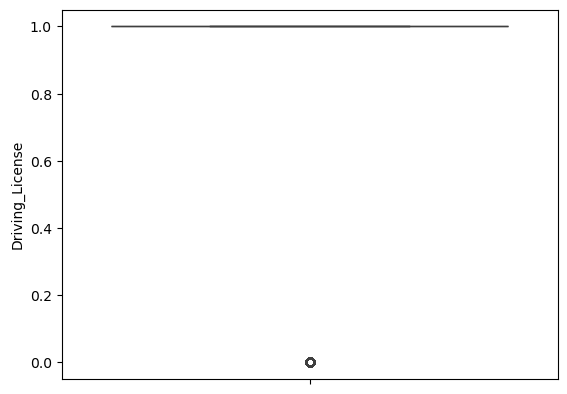

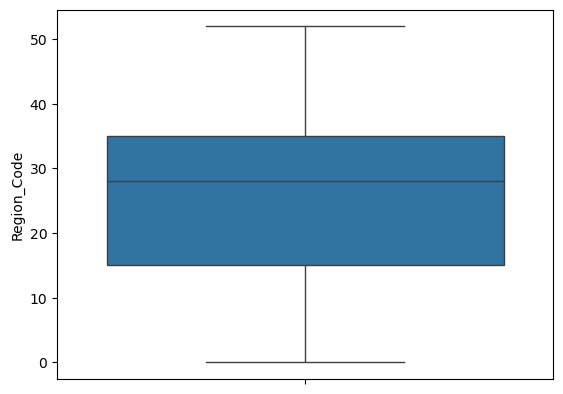

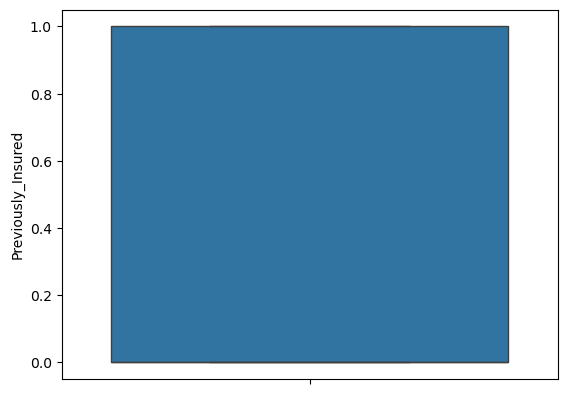

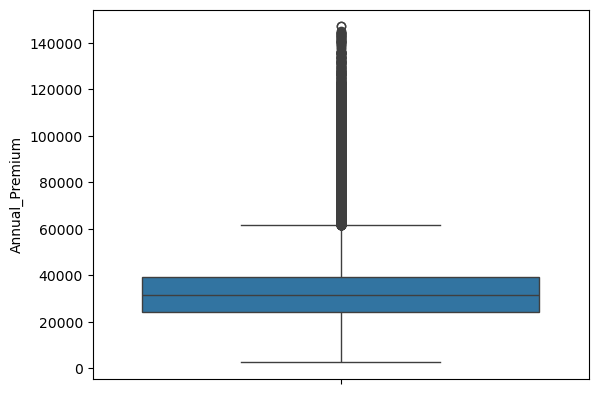

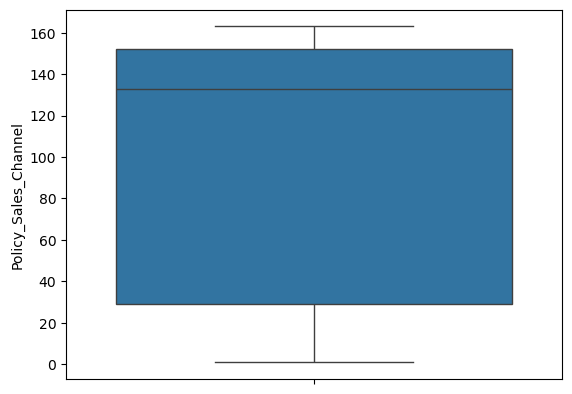

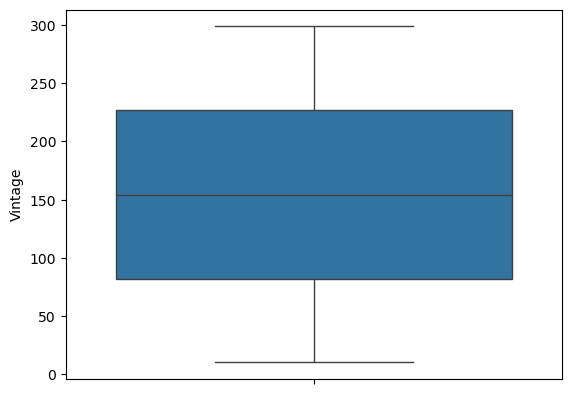

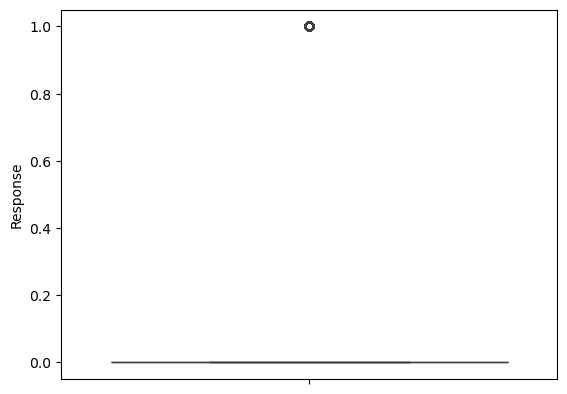

In [106]:
for i in num_col:
    sns.boxplot(train_data[i])
    plt.show()

<Axes: ylabel='Annual_Premium'>

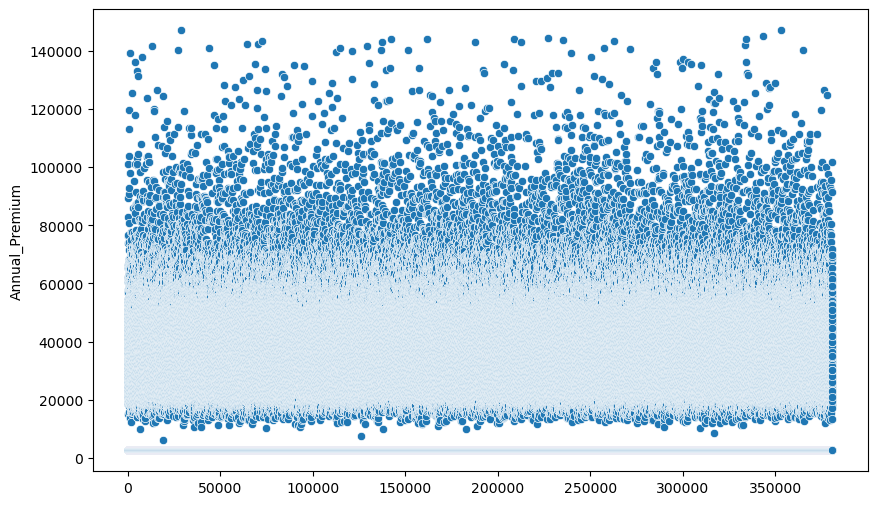

In [107]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(train_data)), y=train_data['Annual_Premium'])

In [108]:
train_data[train_data['Annual_Premium'] >150000].count()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [109]:
train_data[train_data['Annual_Premium'] <150000].count()

id                      380918
Gender                  380918
Age                     380918
Driving_License         380918
Region_Code             380918
Previously_Insured      380918
Vehicle_Age             380918
Vehicle_Damage          380918
Annual_Premium          380918
Policy_Sales_Channel    380918
Vintage                 380918
Response                380918
dtype: int64

In [110]:
###### -- > we have outliers after range of 150000

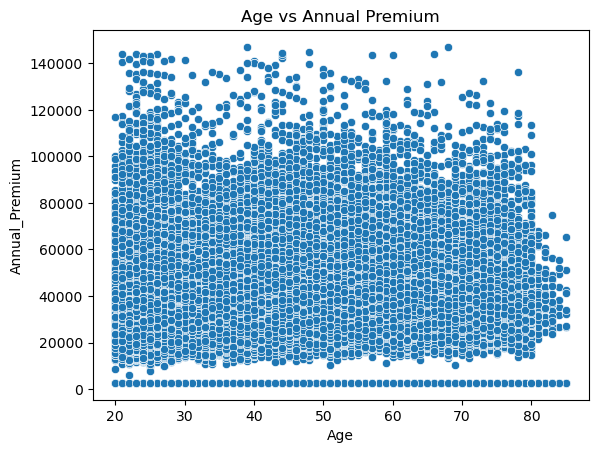

In [111]:
sns.scatterplot(x=train_data['Age'], y=train_data['Annual_Premium'])
plt.title("Age vs Annual Premium")
plt.show()

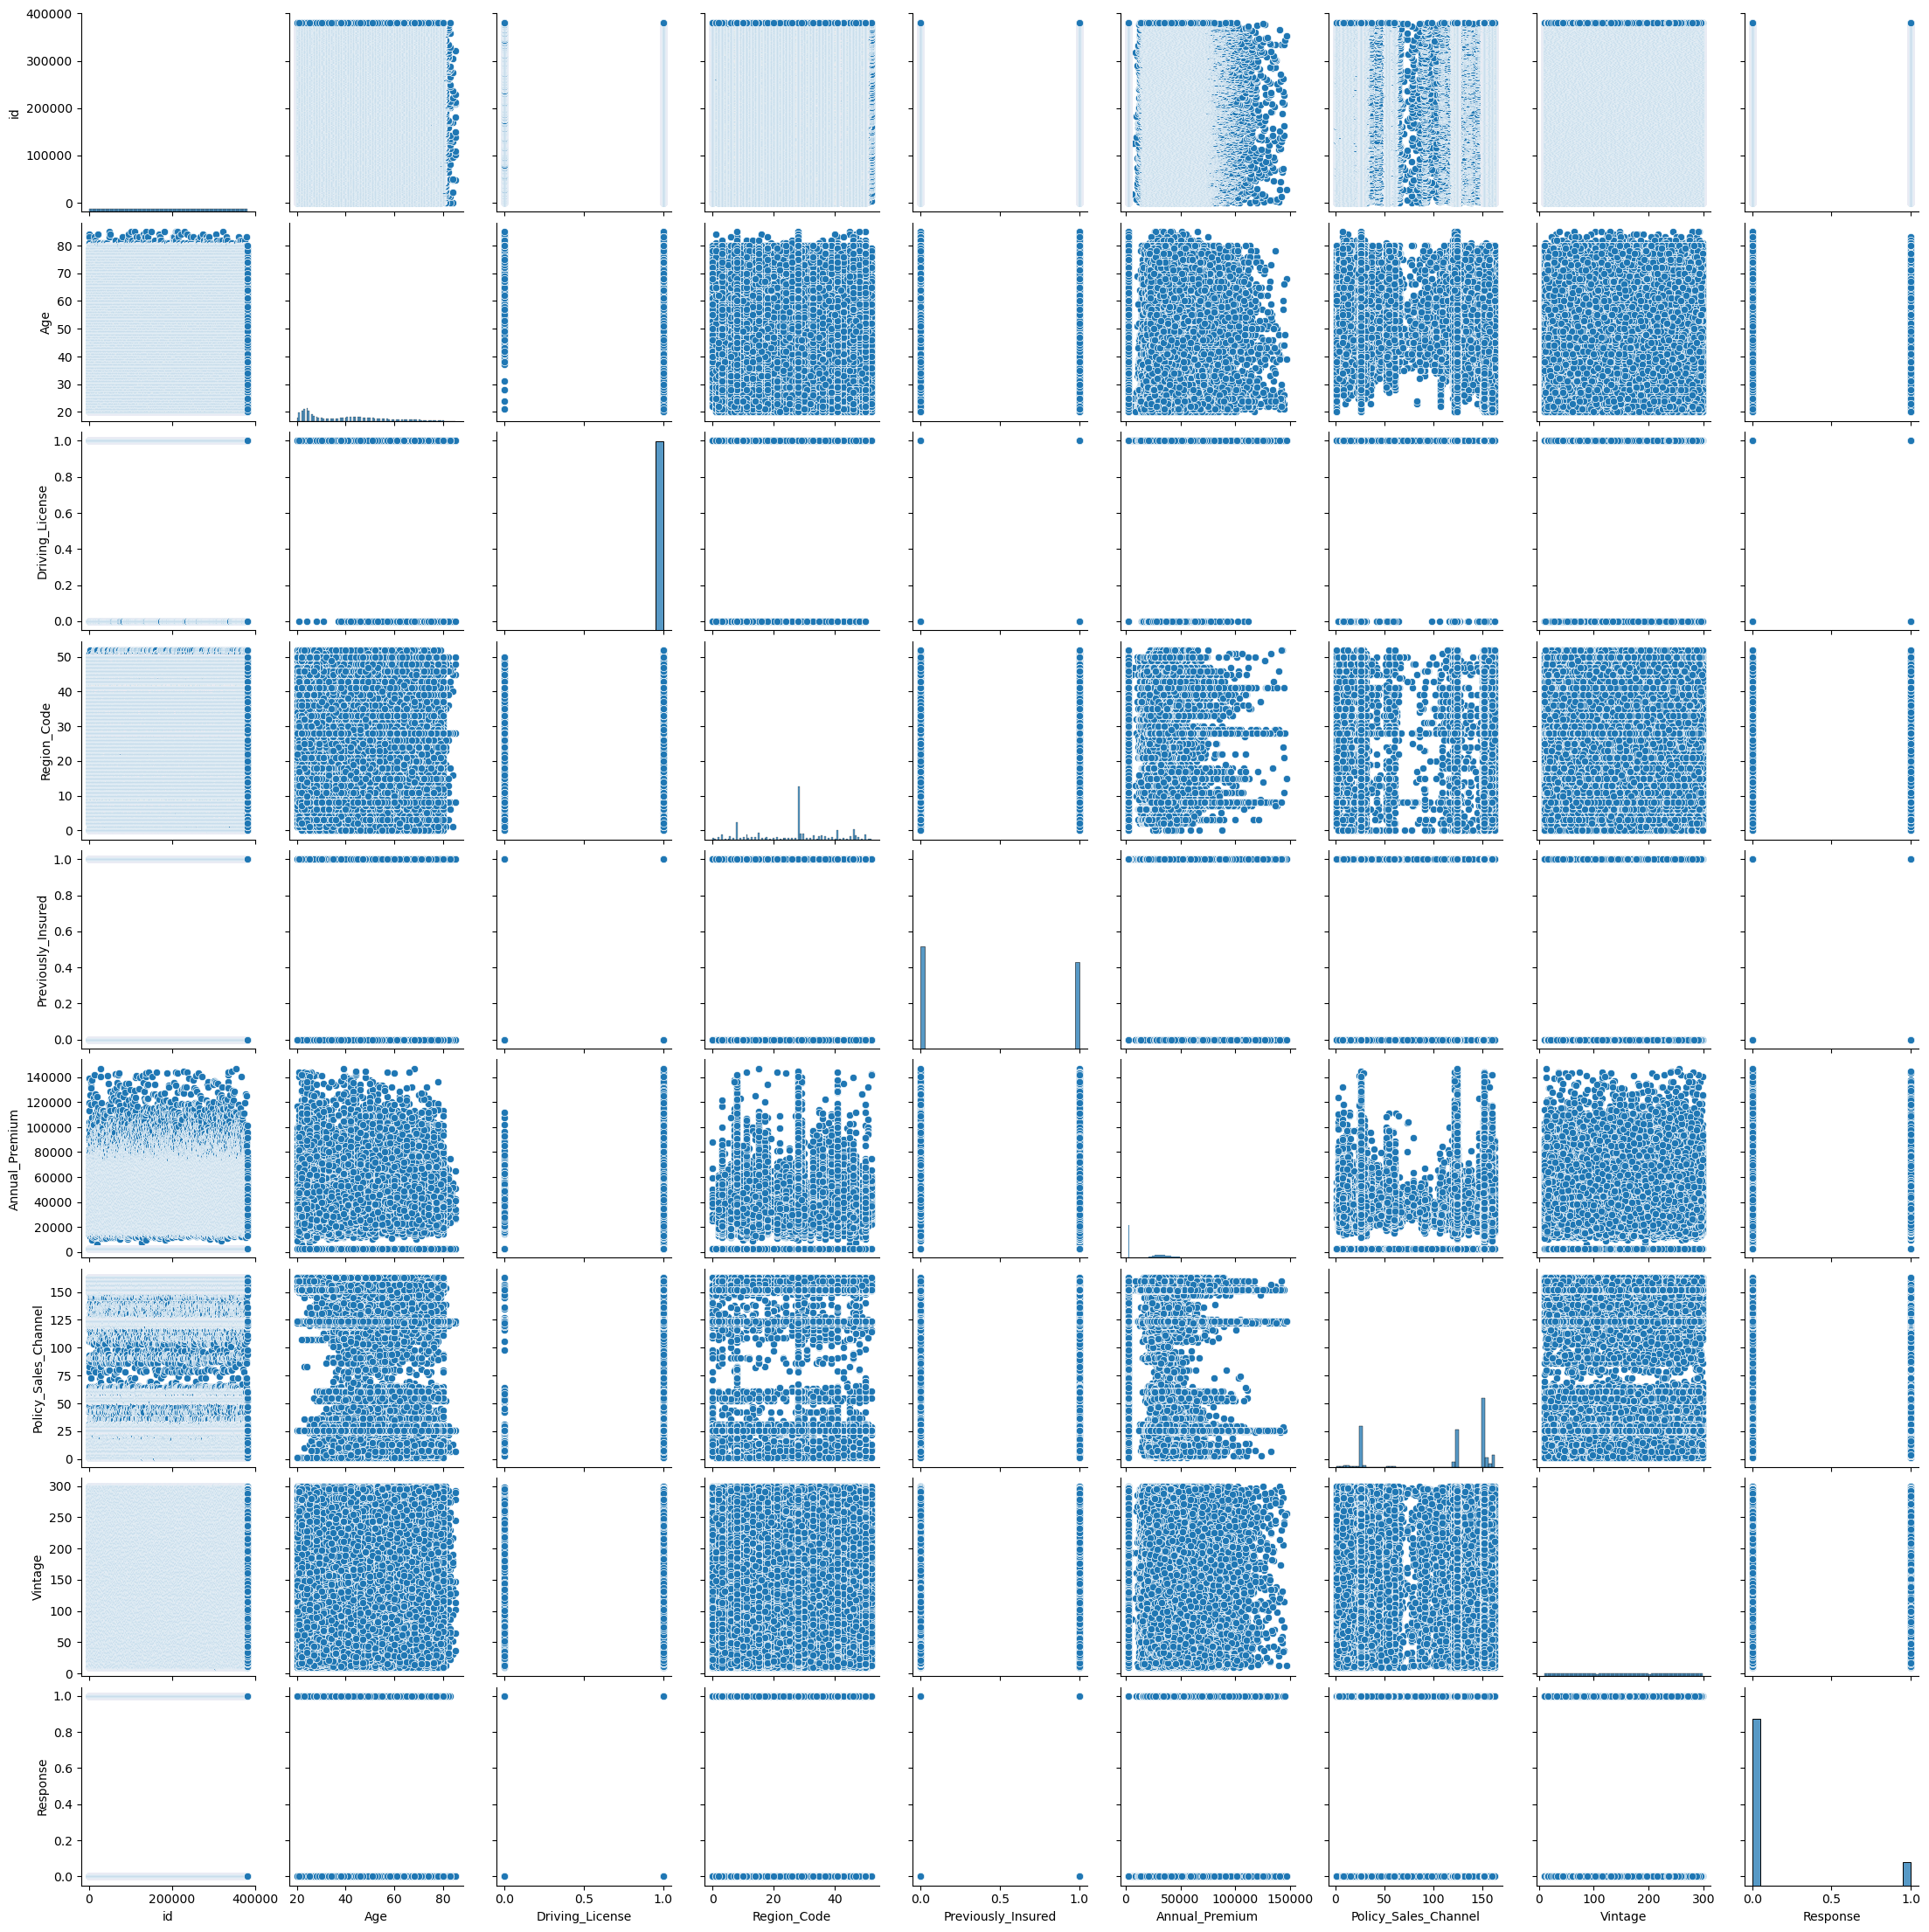

In [112]:
sns.pairplot(train_data)

<Axes: >

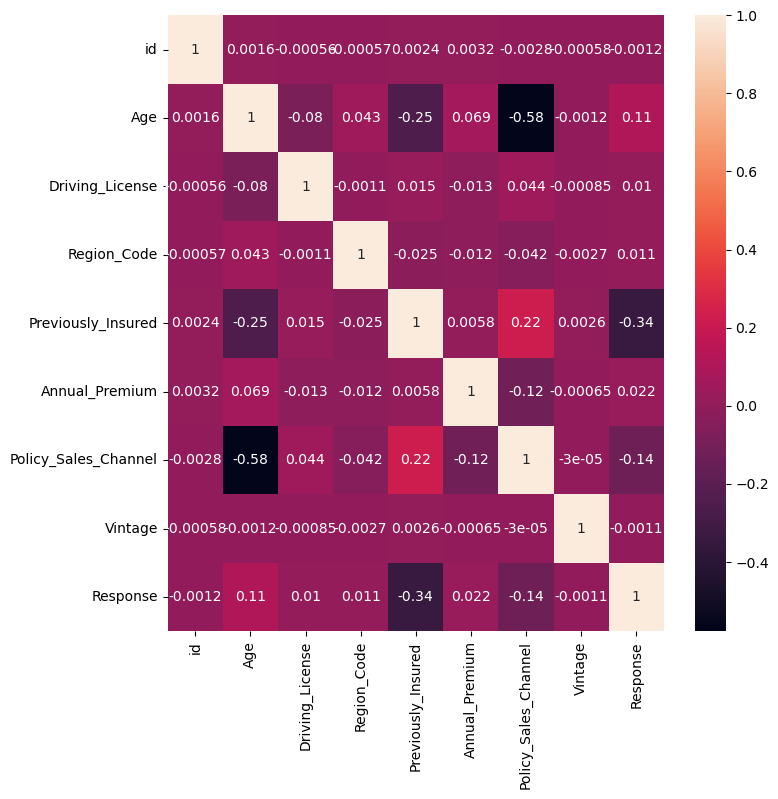

In [113]:
plt.figure(figsize=(8, 8))
sns.heatmap(train_data[num_col].corr(), annot=True)

In [114]:
print((train_data.groupby(['Gender','Response'])['Response']).size())

Gender  Response
Female  0           156746
        1            18176
Male    0           177495
        1            28501
Name: Response, dtype: int64


### Preprocessing

#### ----> over Sampeling

In [ ]:
train_data = train_data[train_data['Annual_Premium'] <150000] ## Outlier

In [8]:
x = train_data.drop(columns='Response')
y = train_data['Response']

In [9]:
over_sampeling = RandomOverSampler()
x_os , y_os = over_sampeling.fit_resample(x , y)

In [10]:
x_os.shape , y_os.shape

((668482, 11), (668482,))

In [11]:
train_os = pd.concat([x_os , y_os],axis=1)

In [12]:
data = pd.concat([train_os,test_data])

In [13]:
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})
data['Vehicle_Damage'] = data['Vehicle_Damage'].map({'No': 0, 'Yes': 1})

In [14]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1.0
1,2,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0.0
2,3,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1.0
3,4,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0.0
4,5,0,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0.0


In [15]:
encoded_data = pd.get_dummies(data,columns = ['Vehicle_Age'],drop_first =  True)

In [16]:
encoded_data.drop(columns = 'id',inplace=True)

In [17]:
prepr_train = encoded_data[encoded_data['Response'].notna()]
prepr_test = encoded_data[encoded_data['Response'].isna()]
prepr_test = prepr_test.drop(columns='Response')

In [18]:
encoded_data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,28.0,0,1,40454.0,26.0,217,1.0,False,True
1,1,76,1,3.0,0,0,33536.0,26.0,183,0.0,False,False
2,1,47,1,28.0,0,1,38294.0,26.0,27,1.0,False,True
3,1,21,1,11.0,1,0,28619.0,152.0,203,0.0,True,False
4,0,29,1,41.0,1,0,27496.0,152.0,39,0.0,True,False


### Pipeline Building

In [19]:
def results(x_train , x_test , y_train , y_test , model):
    model.fit(x_train,y_train)
    train_predict = model.predict(x_train)
    test_predict = model.predict(x_test)
    print('Train F1_score:',f1_score(y_train , train_predict))
    print('Test F1_score:',f1_score(y_test , test_predict))
    print('Train Accuracy_score:\n',accuracy_score(y_train , train_predict))
    print('Test Accuracy_score:\n',accuracy_score(y_test , test_predict))
    print('Train confusion_matrix:\n',confusion_matrix(y_train , train_predict))
    print('Test confusion_matrix:\n',confusion_matrix(y_test , test_predict))
    print('Train Classification_Report:\n',classification_report(y_train , train_predict))
    print('Test Classification_Report:\n',classification_report(y_test , test_predict))

In [20]:
x = prepr_train.drop(columns='Response')
y = prepr_train['Response']

In [21]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.3 , random_state= 42)

In [22]:
x.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years'],
      dtype='object')

In [23]:
num_var = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

In [24]:
numerical_attribute = Pipeline( steps= [
    ('Scaling',MinMaxScaler())
])

In [25]:
PreProcessing = ColumnTransformer( transformers= [
    ('numerical_data',numerical_attribute,num_var)   
])

In [26]:
PreProcessing = ColumnTransformer( transformers= [
    ('numerical_data',numerical_attribute,num_var)   
])

### 1) Linear regression

In [27]:
model_1 = Pipeline( steps=[
    ('Preprocessing',PreProcessing),
    ('Linear Regression',LogisticRegression())
])

In [37]:
results(x_train , x_test , y_train , y_test , model_1)

Train F1_score: 0.549410727097414
Test F1_score: 0.5492091575716235
Train Accuracy_score:
 0.5785672002855086
Test Accuracy_score:
 0.5781994066169688
Train confusion_matrix:
 [[150506  83846]
 [113358 120227]]
Test confusion_matrix:
 [[64426 35463]
 [49127 51529]]
Train Classification_Report:
               precision    recall  f1-score   support

         0.0       0.57      0.64      0.60    234352
         1.0       0.59      0.51      0.55    233585

    accuracy                           0.58    467937
   macro avg       0.58      0.58      0.58    467937
weighted avg       0.58      0.58      0.58    467937

Test Classification_Report:
               precision    recall  f1-score   support

         0.0       0.57      0.64      0.60     99889
         1.0       0.59      0.51      0.55    100656

    accuracy                           0.58    200545
   macro avg       0.58      0.58      0.58    200545
weighted avg       0.58      0.58      0.58    200545



In [29]:
model_1_1 = Pipeline( steps=[
    ('Preprocessing',PreProcessing),
    ('polyfeature',PolynomialFeatures(degree=2)),
    ('K Best', SelectKBest(f_classif , k= 15)),
    ('Linear Regression',LogisticRegression())
])

In [30]:
results(x_train , x_test , y_train , y_test , model_1_1)

Train F1_score: 0.6885479462867404
Test F1_score: 0.6898011274950878
Train Accuracy_score:
 0.6627045948493067
Test Accuracy_score:
 0.663068139320352
Train confusion_matrix:
 [[135638  98714]
 [ 59119 174466]]
Test confusion_matrix:
 [[57846 42043]
 [25527 75129]]
Train Classification_Report:
               precision    recall  f1-score   support

         0.0       0.70      0.58      0.63    234352
         1.0       0.64      0.75      0.69    233585

    accuracy                           0.66    467937
   macro avg       0.67      0.66      0.66    467937
weighted avg       0.67      0.66      0.66    467937

Test Classification_Report:
               precision    recall  f1-score   support

         0.0       0.69      0.58      0.63     99889
         1.0       0.64      0.75      0.69    100656

    accuracy                           0.66    200545
   macro avg       0.67      0.66      0.66    200545
weighted avg       0.67      0.66      0.66    200545



## 2 ) Randdom Forest

In [ ]:
model_2 = Pipeline( steps=[
    ('Preprocessing',PreProcessing),
    ('RF',RandomForestClassifier(max_depth=5 , min_samples_leaf= 5 , min_samples_split= 5))
])

In [ ]:
results(x_train , x_test , y_train , y_test , model_2)

In [ ]:
y_pre = model_2.predict(prepr_test)
sample_sub['Response']=y_pre
sample_sub['Response']=sample_sub['Response'].astype(int)
sample_sub.to_csv('RF_OS_MD5_Leaf5_split5.csv',index=False)

In [ ]:
model_2_1 = Pipeline( steps=[
    ('RF',RandomForestClassifier(max_depth=35 , min_samples_leaf= 5 , min_samples_split= 5))
])

In [ ]:
results(x_train , x_test , y_train , y_test , model_2_1)

In [ ]:
y_pre = model_2_1.predict(prepr_test)
sample_sub['Response']=y_pre
sample_sub['Response']=sample_sub['Response'].astype(int)
sample_sub.to_csv('RF_OS_MD35.csv',index=False)

In [ ]:
model_2_2 = Pipeline( steps=[
    ('RF',RandomForestClassifier(max_depth=45 , min_samples_leaf= 5 , min_samples_split= 5))
])

In [ ]:
results(x_train , x_test , y_train , y_test , model_2_2)

In [ ]:
y_pre = model_2_2.predict(prepr_test)
sample_sub['Response']=y_pre
sample_sub['Response']=sample_sub['Response'].astype(int)
sample_sub.to_csv('RF_OS_MD45_type1.csv',index=False)

In [ ]:
model_2_3 = Pipeline( steps=[
    ('RF',RandomForestClassifier(max_depth=45 , min_samples_leaf= 3 , min_samples_split= 2))
])

In [ ]:
results(x_train , x_test , y_train , y_test , model_2_3)

In [ ]:
y_pre = model_2_3.predict(prepr_test)
sample_sub['Response']=y_pre
sample_sub['Response']=sample_sub['Response'].astype(int)
sample_sub.to_csv('RF_OS_MD45.csv',index=False)

In [ ]:
model_2_4 = Pipeline( steps=[
    ('RF',RandomForestClassifier(max_depth=55 , min_samples_leaf= 3 , min_samples_split= 2))
])

In [ ]:
results(x_train , x_test , y_train , y_test , model_2_4)

In [ ]:
model_2_5 = Pipeline( steps=[
    ('RF',RandomForestClassifier(max_depth=20 , min_samples_leaf= 5 , min_samples_split= 5))
])

In [ ]:
results(x_train , x_test , y_train , y_test , model_2_5)

In [ ]:
y_pre = model_2_5.predict(prepr_test)
sample_sub['Response']=y_pre
sample_sub['Response']=sample_sub['Response'].astype(int)
sample_sub.to_csv('RF_OS_MD20.csv',index=False)

In [55]:
model_2_6 = Pipeline( steps=[
    ('RF',RandomForestClassifier(max_depth=15 , min_samples_leaf= 8 , min_samples_split= 8))
])

In [56]:
results(x_train , x_test , y_train , y_test , model_2_6)

Train F1_score: 0.8409919380454676
Test F1_score: 0.8365444484394594
Train Accuracy_score:
 0.8202749515426222
Test Accuracy_score:
 0.8141165324490762
Train confusion_matrix:
 [[161435  72917]
 [ 11183 222402]]
Test confusion_matrix:
 [[67875 32014]
 [ 5264 95392]]
Train Classification_Report:
               precision    recall  f1-score   support

         0.0       0.94      0.69      0.79    234352
         1.0       0.75      0.95      0.84    233585

    accuracy                           0.82    467937
   macro avg       0.84      0.82      0.82    467937
weighted avg       0.84      0.82      0.82    467937

Test Classification_Report:
               precision    recall  f1-score   support

         0.0       0.93      0.68      0.78     99889
         1.0       0.75      0.95      0.84    100656

    accuracy                           0.81    200545
   macro avg       0.84      0.81      0.81    200545
weighted avg       0.84      0.81      0.81    200545



In [ ]:
y_pre = model_2_5.predict(prepr_test)
sample_sub['Response']=y_pre
sample_sub['Response']=sample_sub['Response'].astype(int)
sample_sub.to_csv('RF_OS_MD15_mleaf_8.csv',index=False)

## 3 Boosting

In [31]:
model_3 = Pipeline( steps=[
    ('Adaboosting',AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=25 , min_samples_leaf= 10 , min_samples_split= 10)))
])

In [32]:
results(x_train , x_test , y_train , y_test , model_3)

Train F1_score: 0.9999357876712329
Test F1_score: 0.9573925744890068
Train Accuracy_score:
 0.9999358888055443
Test Accuracy_score:
 0.9554912862449825
Train confusion_matrix:
 [[234322     30]
 [     0 233585]]
Test confusion_matrix:
 [[ 91335   8554]
 [   372 100284]]
Train Classification_Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    234352
         1.0       1.00      1.00      1.00    233585

    accuracy                           1.00    467937
   macro avg       1.00      1.00      1.00    467937
weighted avg       1.00      1.00      1.00    467937

Test Classification_Report:
               precision    recall  f1-score   support

         0.0       1.00      0.91      0.95     99889
         1.0       0.92      1.00      0.96    100656

    accuracy                           0.96    200545
   macro avg       0.96      0.96      0.96    200545
weighted avg       0.96      0.96      0.96    200545



In [ ]:
y_pre = model_3.predict(prepr_test)
sample_sub['Response']=y_pre
sample_sub['Response']=sample_sub['Response'].astype(int)
sample_sub.to_csv('BoostingADA_OS_DT_MD15.csv',index=False)

In [53]:
model_3_1 = Pipeline( steps=[
    ('XGboosting',XGBClassifier(estimator=DecisionTreeClassifier(max_depth=5 , min_samples_leaf= 10 , min_samples_split= 10)))
])

In [54]:
results(x_train , x_test , y_train , y_test , model_3_1)

Train F1_score: 0.8385510153970318
Test F1_score: 0.8347534176991541
Train Accuracy_score:
 0.8187384199155014
Test Accuracy_score:
 0.8134533396494552
Train confusion_matrix:
 [[162847  71505]
 [ 13314 220271]]
Test confusion_matrix:
 [[68642 31247]
 [ 6164 94492]]
Train Classification_Report:
               precision    recall  f1-score   support

         0.0       0.92      0.69      0.79    234352
         1.0       0.75      0.94      0.84    233585

    accuracy                           0.82    467937
   macro avg       0.84      0.82      0.82    467937
weighted avg       0.84      0.82      0.82    467937

Test Classification_Report:
               precision    recall  f1-score   support

         0.0       0.92      0.69      0.79     99889
         1.0       0.75      0.94      0.83    100656

    accuracy                           0.81    200545
   macro avg       0.83      0.81      0.81    200545
weighted avg       0.83      0.81      0.81    200545



In [42]:
model_3_2 = XGBClassifier()

In [44]:
x_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
483756,1,40,1,46.0,0,1,31558.0,124.0,245,False,False
244540,0,26,1,45.0,0,1,31620.0,152.0,230,True,False
140604,1,30,1,21.0,1,0,2630.0,152.0,210,True,False
55568,0,27,1,13.0,1,0,25714.0,152.0,172,True,False
549481,1,51,1,8.0,0,1,60324.0,26.0,111,False,False


In [47]:
results(x_train , x_test , y_train , y_test , model_3_2)

Train F1_score: 0.8385510153970318
Test F1_score: 0.8347534176991541
Train Accuracy_score:
 0.8187384199155014
Test Accuracy_score:
 0.8134533396494552
Train confusion_matrix:
 [[162847  71505]
 [ 13314 220271]]
Test confusion_matrix:
 [[68642 31247]
 [ 6164 94492]]
Train Classification_Report:
               precision    recall  f1-score   support

         0.0       0.92      0.69      0.79    234352
         1.0       0.75      0.94      0.84    233585

    accuracy                           0.82    467937
   macro avg       0.84      0.82      0.82    467937
weighted avg       0.84      0.82      0.82    467937

Test Classification_Report:
               precision    recall  f1-score   support

         0.0       0.92      0.69      0.79     99889
         1.0       0.75      0.94      0.83    100656

    accuracy                           0.81    200545
   macro avg       0.83      0.81      0.81    200545
weighted avg       0.83      0.81      0.81    200545



In [45]:
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

In [51]:
import re
x_train.columns = [re.sub(r"[\[\]<>]", "", col) for col in x_train.columns]
x_test.columns = [re.sub(r"[\[\]<>]", "", col) for col in x_test.columns]
prepr_test.columns = [re.sub(r"[\[\]<>]", "", col) for col in prepr_test.columns]


In [52]:
y_pre = model_3_2.predict(prepr_test)
sample_sub['Response']=y_pre
sample_sub['Response']=sample_sub['Response'].astype(int)
sample_sub.to_csv('BoostingXGB_OS_no_parameters.csv',index=False)

#### 4 KNN

In [57]:
model_Knn = Pipeline( steps=[
    ('Preprocessing',PreProcessing),
    ('Knn',KNeighborsClassifier(n_neighbors=8))
])

In [58]:
results(x_train , x_test , y_train , y_test , model_Knn)

Train F1_score: 0.83687089802155
Test F1_score: 0.7765827482401103
Train Accuracy_score:
 0.8238651784321394
Test Accuracy_score:
 0.7583435139245556
Train confusion_matrix:
 [[174105  60247]
 [ 22173 211412]]
Test confusion_matrix:
 [[67855 32034]
 [16429 84227]]
Train Classification_Report:
               precision    recall  f1-score   support

         0.0       0.89      0.74      0.81    234352
         1.0       0.78      0.91      0.84    233585

    accuracy                           0.82    467937
   macro avg       0.83      0.82      0.82    467937
weighted avg       0.83      0.82      0.82    467937

Test Classification_Report:
               precision    recall  f1-score   support

         0.0       0.81      0.68      0.74     99889
         1.0       0.72      0.84      0.78    100656

    accuracy                           0.76    200545
   macro avg       0.76      0.76      0.76    200545
weighted avg       0.76      0.76      0.76    200545



#### 5 NB

In [59]:
model_NB = Pipeline( steps=[
    ('Preprocessing',PreProcessing),
    ('NB',GaussianNB())
])

In [61]:
results(x_train , x_test , y_train , y_test , model_NB)

Train F1_score: 0.6142105877218379
Test F1_score: 0.6159688941133918
Train Accuracy_score:
 0.6184144446795188
Test Accuracy_score:
 0.6188087461666958
Train confusion_matrix:
 [[147239  87113]
 [ 91445 142140]]
Test confusion_matrix:
 [[62791 37098]
 [39348 61308]]
Train Classification_Report:
               precision    recall  f1-score   support

         0.0       0.62      0.63      0.62    234352
         1.0       0.62      0.61      0.61    233585

    accuracy                           0.62    467937
   macro avg       0.62      0.62      0.62    467937
weighted avg       0.62      0.62      0.62    467937

Test Classification_Report:
               precision    recall  f1-score   support

         0.0       0.61      0.63      0.62     99889
         1.0       0.62      0.61      0.62    100656

    accuracy                           0.62    200545
   macro avg       0.62      0.62      0.62    200545
weighted avg       0.62      0.62      0.62    200545



### 6 Voting

In [66]:
clf1 = XGBClassifier()
clf2 = XGBClassifier(max_depth=5 , min_samples_leaf= 10 , min_samples_split= 10)
clf3 = RandomForestClassifier(max_depth=20 , min_samples_leaf= 5 , min_samples_split= 5)
clf4 = RandomForestClassifier(max_depth=15 , min_samples_leaf= 8 , min_samples_split= 8)


In [89]:
voting = VotingClassifier(estimators=
                          [
                              ('XGB1',clf1),
                              ('XGB2',clf2),
                              ('RF1',clf3),
                              ('RF2',clf4)
                          ],voting='soft')

In [90]:
results(x_train , x_test , y_train , y_test , voting )

Train F1_score: 0.8478438093649162
Test F1_score: 0.8420941552017517
Train Accuracy_score:
 0.8284897325922079
Test Accuracy_score:
 0.8209229848662395
Train confusion_matrix:
 [[164080  70272]
 [  9984 223601]]
Test confusion_matrix:
 [[68872 31017]
 [ 4896 95760]]
Train Classification_Report:
               precision    recall  f1-score   support

         0.0       0.94      0.70      0.80    234352
         1.0       0.76      0.96      0.85    233585

    accuracy                           0.83    467937
   macro avg       0.85      0.83      0.83    467937
weighted avg       0.85      0.83      0.83    467937

Test Classification_Report:
               precision    recall  f1-score   support

         0.0       0.93      0.69      0.79     99889
         1.0       0.76      0.95      0.84    100656

    accuracy                           0.82    200545
   macro avg       0.84      0.82      0.82    200545
weighted avg       0.84      0.82      0.82    200545



In [71]:
y_pre = voting.predict(prepr_test)
sample_sub['Response']=y_pre
sample_sub['Response']=sample_sub['Response'].astype(int)
sample_sub.to_csv('softVoting_OS_.csv',index=False)

In [72]:
voting_hard = VotingClassifier(estimators=
                          [
                              ('XGB1',clf1),
                              ('XGB2',clf2),
                              ('RF1',clf3),
                              ('RF2',clf4)
                          ],voting='hard')

In [73]:
results(x_train , x_test , y_train , y_test , voting_hard )

Train F1_score: 0.844059278029884
Test F1_score: 0.8388387589058355
Train Accuracy_score:
 0.8258804069778624
Test Accuracy_score:
 0.8188536238749408
Train confusion_matrix:
 [[165955  68397]
 [ 13080 220505]]
Test confusion_matrix:
 [[69674 30215]
 [ 6113 94543]]
Train Classification_Report:
               precision    recall  f1-score   support

         0.0       0.93      0.71      0.80    234352
         1.0       0.76      0.94      0.84    233585

    accuracy                           0.83    467937
   macro avg       0.85      0.83      0.82    467937
weighted avg       0.85      0.83      0.82    467937

Test Classification_Report:
               precision    recall  f1-score   support

         0.0       0.92      0.70      0.79     99889
         1.0       0.76      0.94      0.84    100656

    accuracy                           0.82    200545
   macro avg       0.84      0.82      0.82    200545
weighted avg       0.84      0.82      0.82    200545



In [76]:
y_pre = voting_hard.predict(prepr_test)
sample_sub['Response']=y_pre
sample_sub['Response']=sample_sub['Response'].astype(int)
sample_sub.to_csv('hardVoting_OS_.csv',index=False)

#### 7 Stacking

In [75]:
estimator = [('XGB1',clf1),('XGB2',clf2),('RF1',clf3),('RF2',clf4)]

In [77]:
stacking = StackingClassifier(estimators= estimator , final_estimator= LogisticRegression())

In [78]:
results(x_train , x_test , y_train , y_test , stacking )

Train F1_score: 0.9184937611408199
Test F1_score: 0.884990416643406
Train Accuracy_score:
 0.9140097919164332
Test Accuracy_score:
 0.8767259218629235
Train confusion_matrix:
 [[200978  33374]
 [  6864 226721]]
Test confusion_matrix:
 [[80706 19183]
 [ 5539 95117]]
Train Classification_Report:
               precision    recall  f1-score   support

         0.0       0.97      0.86      0.91    234352
         1.0       0.87      0.97      0.92    233585

    accuracy                           0.91    467937
   macro avg       0.92      0.91      0.91    467937
weighted avg       0.92      0.91      0.91    467937

Test Classification_Report:
               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     99889
         1.0       0.83      0.94      0.88    100656

    accuracy                           0.88    200545
   macro avg       0.88      0.88      0.88    200545
weighted avg       0.88      0.88      0.88    200545



In [80]:
y_pre = stacking.predict(prepr_test)
sample_sub['Response']=y_pre
sample_sub['Response']=sample_sub['Response'].astype(int)
sample_sub.to_csv('stacking_OS_.csv',index=False)

In [81]:
stacking_XGB = StackingClassifier(estimators= estimator , final_estimator= XGBClassifier())

In [82]:
results(x_train , x_test , y_train , y_test , stacking_XGB )

Train F1_score: 0.9231986718091909
Test F1_score: 0.8855138659269015
Train Accuracy_score:
 0.9195297657590659
Test Accuracy_score:
 0.8777630955645865
Train confusion_matrix:
 [[203964  30388]
 [  7267 226318]]
Test confusion_matrix:
 [[81227 18662]
 [ 5852 94804]]
Train Classification_Report:
               precision    recall  f1-score   support

         0.0       0.97      0.87      0.92    234352
         1.0       0.88      0.97      0.92    233585

    accuracy                           0.92    467937
   macro avg       0.92      0.92      0.92    467937
weighted avg       0.92      0.92      0.92    467937

Test Classification_Report:
               precision    recall  f1-score   support

         0.0       0.93      0.81      0.87     99889
         1.0       0.84      0.94      0.89    100656

    accuracy                           0.88    200545
   macro avg       0.88      0.88      0.88    200545
weighted avg       0.88      0.88      0.88    200545



In [83]:
y_pre = stacking_XGB.predict(prepr_test)
sample_sub['Response']=y_pre
sample_sub['Response']=sample_sub['Response'].astype(int)
sample_sub.to_csv('stacking_XGB_OS_.csv',index=False)

## Saving in PKL

In [115]:
joblib.dump(voting, "Final_predication_SoftVoting.pkl")

['Final_predication_SoftVoting.pkl']

In [116]:
loaded_model = joblib.load("Final_predication_SoftVoting.pkl")

In [118]:
loaded_model

VotingClassifier(estimators=[('XGB1',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_r...
                                            max_leaves=None,
                                            min_child_weight=None,
                                            min_samples_leaf=10,
                                            min_samples_split=10, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None, ...)),
                             ('RF1',
                              RandomForestClassifier(max_depth=20,
                                                     min_samples_leaf=5,
                                                     min_samples_split=5)),
                             ('RF2',
                              RandomForestClassifier(max_depth=15,
                                                     min_samples_leaf=8,
                                                     min_samples_split=8))],
                 voting='soft')

In [119]:
! python --version

Python 3.12.7


In [120]:
prepr_train.iloc[0]

Gender                         1
Age                           44
Driving_License                1
Region_Code                 28.0
Previously_Insured             0
Vehicle_Damage                 1
Annual_Premium           40454.0
Policy_Sales_Channel        26.0
Vintage                      217
Response                     1.0
Vehicle_Age_< 1 Year       False
Vehicle_Age_> 2 Years       True
Name: 0, dtype: object